In [14]:
# Initial imports
import pandas as pd
from pathlib import Path

In [15]:
# Data loading
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [16]:
df_myopia = df_myopia.drop(columns=["MYOPIC"], axis = 1)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia)

Part 2: Apply Dimensionality Reduction

In [18]:
#State desired explained variance: Based on instructions to preserve 90% of of the explained variance 
#in dimensionality reduction, I am looking for this to be done with 2 features, Mommy & Dadmy.

from sklearn.decomposition import PCA

# Initialize PCA model
pca = PCA(n_components=.90)

# Get principal components for the data.
myopia_pca = pca.fit_transform(df_myopia)

In [19]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.72557249, 0.16081428, 0.07227215])

In [33]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(n_components=3, learning_rate=200)

In [34]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia)

In [35]:
# The dataset has 2 columns
tsne_features.shape

(618, 3)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia['y'] = tsne_features[:,1]

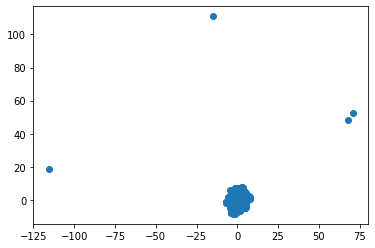

In [39]:
# Visualize the clusters
plt.scatter(df_myopia['x'], df_myopia['y'])
plt.show()

Part 3: Perform a Cluster Analysis with K-means

In [40]:
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\katma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,290702.197821
1,2,175479.915236
2,3,141271.208876
3,4,122863.106103
4,5,106940.277461


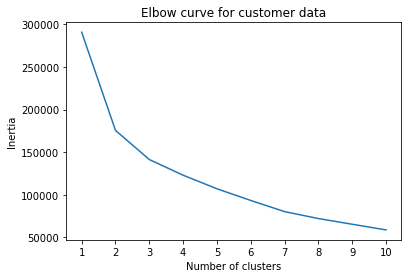

In [41]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Part 4: Make a Recommendation
My recommendation is that the patients can be clusted into 4 groups.